In [3]:
from svfpy import svfpy
import numpy as np
import geopandas as gpd
import pandas as pd
import rioxarray
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
svf_sp = rioxarray.open_rasterio('/media/fernando/DATA/svf-sp/svf_all_percent.tiff')
svf_ny = rioxarray.open_rasterio('/media/fernando/DATA/svf-nyc/svf_all_percent.tiff')

In [156]:
svf_ny

<xarray.DataArray (band: 1, y: 122377, x: 123564)>
[15121391628 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 9.131e+05 9.131e+05 ... 1.068e+06 1.068e+06
  * y            (y) float64 2.73e+05 2.73e+05 2.73e+05 ... 1.2e+05 1.2e+05
    spatial_ref  int64 0
Attributes:
    _FillValue:    -1.0
    scale_factor:  1.0
    add_offset:    0.0

In [155]:
144826*94456

13679684656

In [ ]:
np.histogram(svf_sp[0, 34000:35000, 19000:20000].values, range=(0, 255), bins=30)

In [6]:
svf_sp.rio.height, svf_sp.rio.width

(144826, 94456)

In [99]:
slices = 4

row_ticks = np.ceil(np.linspace(0, svf_sp.rio.height, slices + 1))
col_ticks = np.ceil(np.linspace(0, svf_sp.rio.width, slices + 1))

row_limits =  [np.roll(row_ticks, -i)[0:2] for i in range(slices)]
col_limits =  [np.roll(col_ticks, -i)[0:2] for i in range(slices)]

hists_sp = []

for r in row_limits:
    for c in col_limits:
        print((r, c))
        hist, _ = np.histogram(svf_sp[0, int(r[0]):int(r[1]), int(c[0]):int(c[1])].values, range=(0, 1), bins=25)
        hists_sp.append(hist)


(array([    0., 36207.]), array([    0., 23614.]))
(array([    0., 36207.]), array([23614., 47228.]))
(array([    0., 36207.]), array([47228., 70842.]))
(array([    0., 36207.]), array([70842., 94456.]))
(array([36207., 72413.]), array([    0., 23614.]))
(array([36207., 72413.]), array([23614., 47228.]))
(array([36207., 72413.]), array([47228., 70842.]))
(array([36207., 72413.]), array([70842., 94456.]))
(array([ 72413., 108620.]), array([    0., 23614.]))
(array([ 72413., 108620.]), array([23614., 47228.]))
(array([ 72413., 108620.]), array([47228., 70842.]))
(array([ 72413., 108620.]), array([70842., 94456.]))
(array([108620., 144826.]), array([    0., 23614.]))
(array([108620., 144826.]), array([23614., 47228.]))
(array([108620., 144826.]), array([47228., 70842.]))
(array([108620., 144826.]), array([70842., 94456.]))


In [110]:
hist_sum = np.sum(np.array(hists), axis=0)

In [111]:
hist_sum

array([    21961,    183494,    975458,   2273194,   5002875,   8217991,
        15563642,  22920014,  38411874,  51115634,  80531580, 102493913,
       153949095, 186544334, 263072625, 303065410, 417187152, 462238112,
       590760982, 593361938, 695673687, 641173939, 630716081, 459316328,
       385370032])

In [142]:
sns.set(rc={"figure.figsize":(9,6)})
sns.set_style("whitegrid", {'axes.grid' : False})

In [143]:
bins = np.linspace(0,1, 26)

<AxesSubplot:>

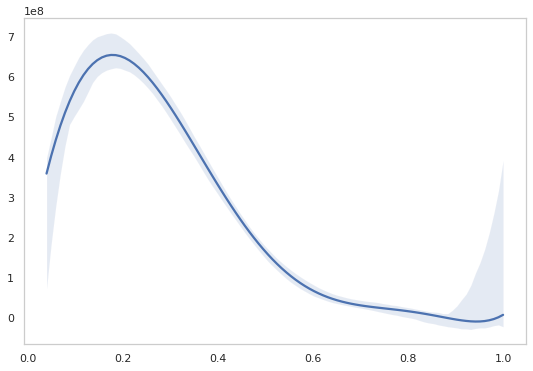

In [148]:
sns.regplot(y=hist_sum,x=bins[1:][::-1], order=6, scatter=False)

<AxesSubplot:>

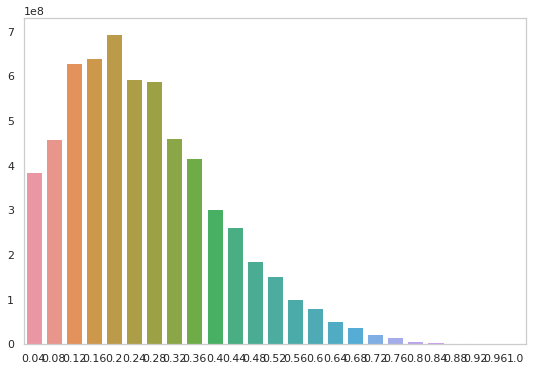

In [145]:
sns.barplot(y=hist_sum,x=bins[1:][::-1])

In [122]:
slices = 4

row_ticks = np.ceil(np.linspace(0, svf_ny.rio.height, slices + 1))
col_ticks = np.ceil(np.linspace(0, svf_ny.rio.width, slices + 1))

row_limits =  [np.roll(row_ticks, -i)[0:2] for i in range(slices)]
col_limits =  [np.roll(col_ticks, -i)[0:2] for i in range(slices)]

hists = []

for r in row_limits:
    for c in col_limits:
        print((r, c))
        hist, _ = np.histogram(svf_ny[0, int(r[0]):int(r[1]), int(c[0]):int(c[1])].values, range=(0, 1), bins=25)
        hists.append(hist)

(array([    0., 30595.]), array([    0., 30891.]))
(array([    0., 30595.]), array([30891., 61782.]))
(array([    0., 30595.]), array([61782., 92673.]))
(array([    0., 30595.]), array([ 92673., 123564.]))
(array([30595., 61189.]), array([    0., 30891.]))
(array([30595., 61189.]), array([30891., 61782.]))
(array([30595., 61189.]), array([61782., 92673.]))
(array([30595., 61189.]), array([ 92673., 123564.]))
(array([61189., 91783.]), array([    0., 30891.]))
(array([61189., 91783.]), array([30891., 61782.]))
(array([61189., 91783.]), array([61782., 92673.]))
(array([61189., 91783.]), array([ 92673., 123564.]))
(array([ 91783., 122377.]), array([    0., 30891.]))
(array([ 91783., 122377.]), array([30891., 61782.]))
(array([ 91783., 122377.]), array([61782., 92673.]))
(array([ 91783., 122377.]), array([ 92673., 123564.]))


In [123]:
hist_sum_ny = np.sum(np.array(hists), axis=0)

<AxesSubplot:>

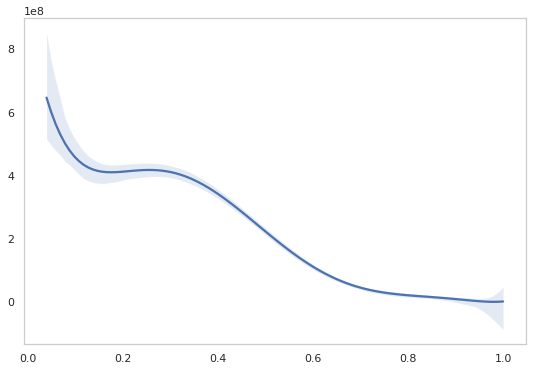

In [151]:
sns.regplot(y=hist_sum_ny,x=bins[1:][::-1], order=6, scatter=False)

<AxesSubplot:>

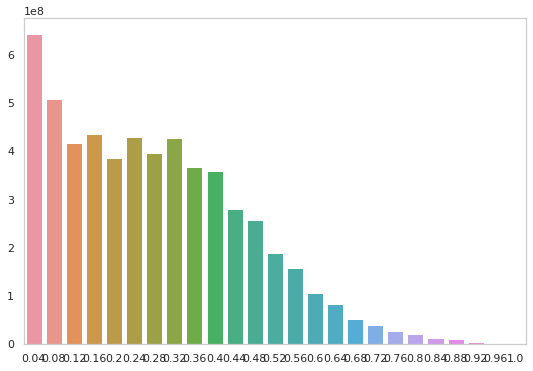

In [150]:
sns.barplot(y=hist_sum_ny,x=bins[1:][::-1])

Polygon ((330872.39521718036849052 7391802.3955181036144495, 
332459.630635465902742 7391802.3955181036144495, 
332459.630635465902742 7393339.6246863380074501, 
330872.39521718036849052 7393339.6246863380074501, 
330872.39521718036849052 7391802.3955181036144495))

Polygon ((987132.29979980178177357 212235.88788545684656128, 
992333.6886886905413121 212235.88788545684656128, 
992333.6886886905413121 217291.44344101232127286,
987132.29979980178177357 217291.44344101232127286, 
987132.29979980178177357 212235.88788545684656128))

In [5]:
#ny
ymin = 212235
ymax = 217291
xmin = 987132
xmax = 992333

t = svf_ny.rio.transform()
t

Affine(1.25, 0.0, 913052.5,
       0.0, -1.25, 272965.0)

In [6]:
(int((ymin - t[5]) / t[4]), int((ymax - t[5]) / t[4]))

(48584, 44539)

In [7]:
int((xmin - t[2]) / t[0]),int((xmax - t[2]) / t[0])

(59263, 63424)

In [8]:
svf_ny_zoom = svf_ny[0, int((ymax - t[5]) / t[4]):int((ymin - t[5]) / t[4]), int((xmin - t[2]) / t[0]):int((xmax - t[2]) / t[0])]

In [11]:
np.median(svf_ny_zoom.values)

0.23193917

In [12]:
np.mean(svf_ny_zoom.values)

0.28563517

In [30]:
pd.set_option('display.float_format', '{:.10f}'.format)

In [35]:
df_svf_ny = pd.DataFrame(pd.Series(svf_ny_zoom.values.ravel()), columns=['svf'])

In [36]:
df_svf_ny

,svf
0,0.6083649993
1,0.5969581604
2,0.5741444826
3,0.5399239659
4,0.4790874422
...,...
16831240,0.3764258623
16831241,0.3726235628
16831242,0.3764258623
16831243,0.3840304315


In [156]:
df_describe_ny = df_svf_ny.describe().T

In [157]:
df_describe_ny.index = ['New York']

In [158]:
df_describe_ny

,count,mean,std,min,25%,50%,75%,max
New York,16831245.0000,0.2856,0.1761,0.0266,0.1559,0.2319,0.3726,0.9772


In [159]:
df_describe_ny.loc[['New York'], 'mode'] = df_svf_ny.svf.mode().iloc[0]

In [160]:
df_describe_ny

,count,mean,std,min,25%,50%,75%,max,mode
New York,16831245.0000,0.2856,0.1761,0.0266,0.1559,0.2319,0.3726,0.9772,0.1483


In [45]:
np.linspace(1,0,26).shape

(26,)

<AxesSubplot:xlabel='svf', ylabel='Count'>

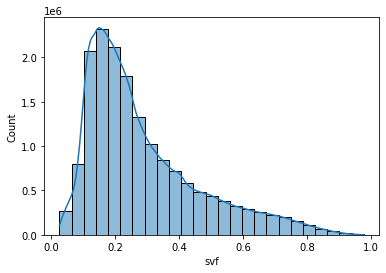

In [95]:
sns.histplot(data=df_svf_ny, x="svf", kde=True, bins=25)

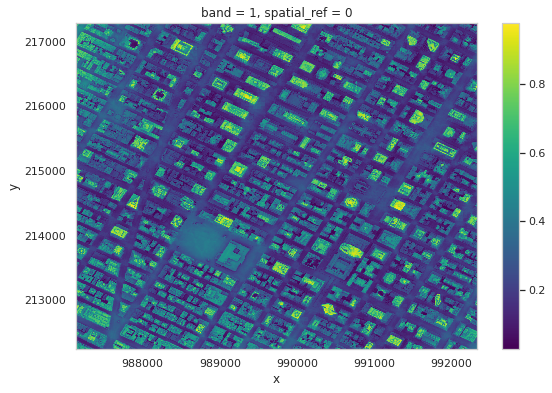

In [180]:
svf_ny[0, int((ymax - t[5]) / t[4]):int((ymin - t[5]) / t[4]), int((xmin - t[2]) / t[0]):int((xmax - t[2]) / t[0])].plot()

(array([2029239., 5540310., 3651560., 2047716., 1295735.,  915235.,
         656111.,  455745.,  206740.,   32854.]),
 array([0.02661597, 0.121673  , 0.21673004, 0.31178707, 0.4068441 ,
        0.50190115, 0.59695816, 0.69201523, 0.78707224, 0.8821293 ,
        0.9771863 ], dtype=float32),
 <BarContainer object of 10 artists>)

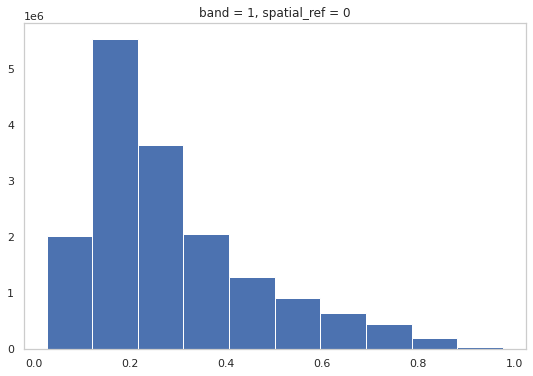

In [181]:
svf_ny[0, int((ymax - t[5]) / t[4]):int((ymin - t[5]) / t[4]), int((xmin - t[2]) / t[0]):int((xmax - t[2]) / t[0])].plot.hist()

In [49]:
#sp
ymin = 7391802
ymax = 7393339
xmin = 330872
xmax = 332459

t = svf_sp.rio.transform()
t

Affine(0.5, 0.0, 313390.0,
       0.0, -0.5, 7416156.0)

In [50]:
(int((ymin - t[5]) / t[4]), int((ymax - t[5]) / t[4]))

(48708, 45634)

In [51]:
int((xmin - t[2]) / t[0]),int((xmax - t[2]) / t[0])

(34964, 38138)

In [52]:
svf_sp_zoom = svf_sp[0, int((ymax - t[5]) / t[4]):int((ymin - t[5]) / t[4]), int((xmin - t[2]) / t[0]):int((xmax - t[2]) / t[0])]

In [54]:
np.median(svf_sp_zoom.values)

0.3816794

In [120]:
df_svf_sp = pd.DataFrame(pd.Series(svf_sp_zoom.values.ravel()), columns=['svf'])

In [161]:
df_describe_sp = df_svf_sp.describe().T

In [162]:
df_describe_sp.index = ['São Paulo']

In [163]:
df_describe_sp.loc[['São Paulo'], 'mode'] = df_svf_sp.svf.mode().iloc[0]

In [164]:
df_describe_sp

,count,mean,std,min,25%,50%,75%,max,mode
São Paulo,9756876.0000,0.4020,0.1577,0.0229,0.2939,0.3817,0.5000,1.0000,0.3359


In [165]:
df_describe = \
pd.concat([df_describe_ny, df_describe_sp]).drop(
    columns=['count']
)

In [166]:
pd.set_option('display.float_format', '{:.4f}'.format)

In [167]:
print(df_describe.to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} &   mean &    std &    min &    25\% &    50\% &    75\% &    max &   mode \\
\midrule
New York  & 0.2856 & 0.1761 & 0.0266 & 0.1559 & 0.2319 & 0.3726 & 0.9772 & 0.1483 \\
São Paulo & 0.4020 & 0.1577 & 0.0229 & 0.2939 & 0.3817 & 0.5000 & 1.0000 & 0.3359 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_82841/2252397828.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_describe.to_latex())


In [63]:
df_svf_sp.svf.mode()

0   0.3358778656
Name: svf, dtype: float32

<AxesSubplot:xlabel='svf', ylabel='Count'>

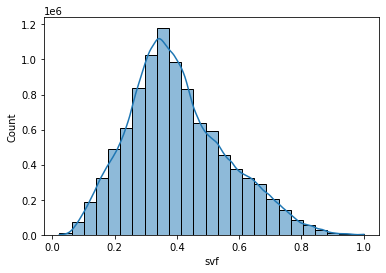

In [59]:
sns.histplot(data=df_svf_sp, x="svf", kde=True, bins=25)

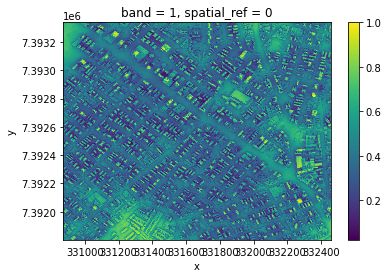

In [53]:
svf_sp_zoom.plot()

AttributeError: 'Rectangle' object has no property 'kde'

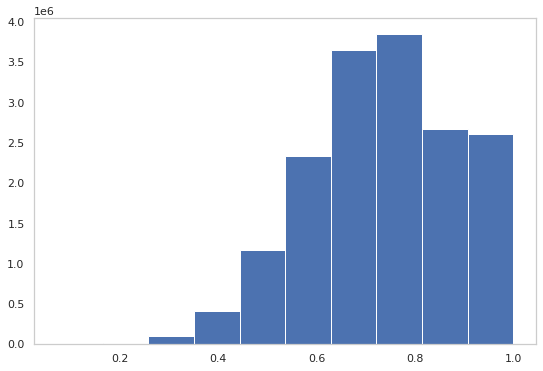

In [182]:
svf_sp[0, int((ymax - t[5]) / t[4]):int((ymin - t[5]) / t[4]), int((xmin - t[2]) / t[0]):int((xmax - t[2]) / t[0])].plot.hist()

In [169]:
a = np.array([5,4,8,1,4,9,5,3])

In [174]:
idx = np.indices(a.shape)
idx

array([[0, 1, 2, 3, 4, 5, 6, 7]])

In [185]:
acc = np.maximum.accumulate(a)
_, repeats = np.unique(acc, return_counts=True)

In [187]:
idx[0, close]

array([0, 2, 5])

In [177]:
close  = np.isclose(a, acc)
close

array([ True, False,  True, False, False,  True, False, False])

In [186]:
np.repeat(idx[0, close], repeats)

array([0, 0, 2, 2, 2, 5, 5, 5])

In [213]:
np.rad2deg(np.arcsin(0.88))

61.64236342367202

In [179]:
idx

array([[0, 1, 2, 3, 4, 5, 6, 7]])